In [3]:
%pip install seaborn
# To avoid the deprecation warning
%pip install pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-3-42c36d0ed1cb>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# Import Datasets
launch_data = pd.read_csv('Launches.csv')

### As the plot shows, we have a very imbalanced dataset when considering this specific fields.

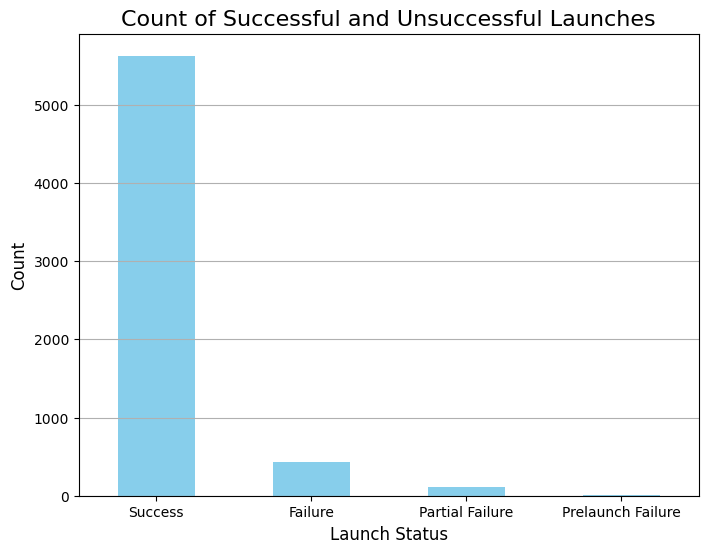

In [5]:
# Count the number of successful and unsuccessful launches
status_counts = launch_data['Launch Status'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color=['skyblue'])
plt.title('Count of Successful and Unsuccessful Launches', fontsize=16)
plt.xlabel('Launch Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Following the first question: does the price influence the success of a Launch?

### Let's follow a Hypothesis Testing.

### Hypothesis
1) Null Hypothesis (Ho): Price has no influence on the success of a launch.
2) Alternative Hypothesis (Ha): Price influences the success of a launch.

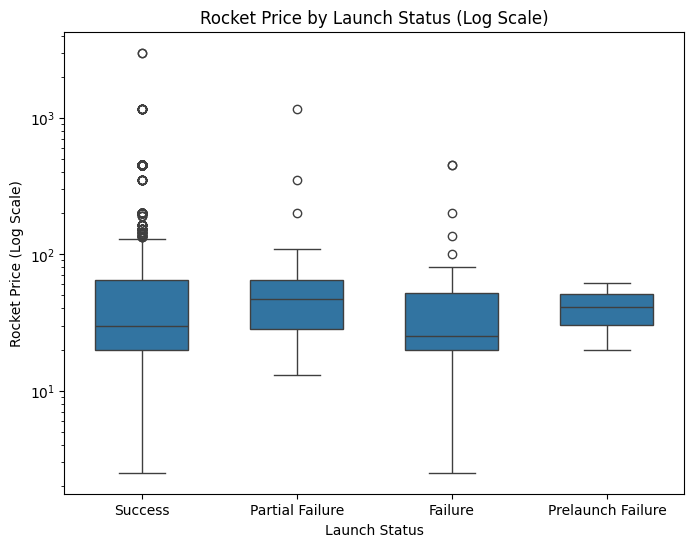

In [6]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x='Launch Status', y='Rocket Price', data=launch_data, width=0.6)
plt.yscale('log') 
plt.title('Rocket Price by Launch Status (Log Scale)')
plt.xlabel('Launch Status')
plt.ylabel('Rocket Price (Log Scale)')
plt.show()

In [22]:
# Drop rows where Rocket Price or Success_Binary are NaN or infinite
import numpy as np
import statsmodels.api as sm

launch_data['Success_Binary'] = (launch_data['Launch Status'] == 'Success').astype(int)
launch_data = launch_data.replace([np.inf, -np.inf], np.nan)
launch_data = launch_data.dropna(subset=['Rocket Price', 'Success_Binary'])

# Redefine X and y
X = launch_data[['Rocket Price']]
X = sm.add_constant(X)
y = launch_data['Success_Binary']

# Fit logistic regression
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.186738
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Success_Binary   No. Observations:                 2272
Model:                          Logit   Df Residuals:                     2270
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                0.002552
Time:                        22:57:10   Log-Likelihood:                -424.27
converged:                       True   LL-Null:                       -425.35
Covariance Type:            nonrobust   LLR p-value:                    0.1407
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9376      0.117     25.018      0.000       2.708       3.168
Rocket Price     0.0013

In [35]:
### Alternative Questions: What Causes Failure?

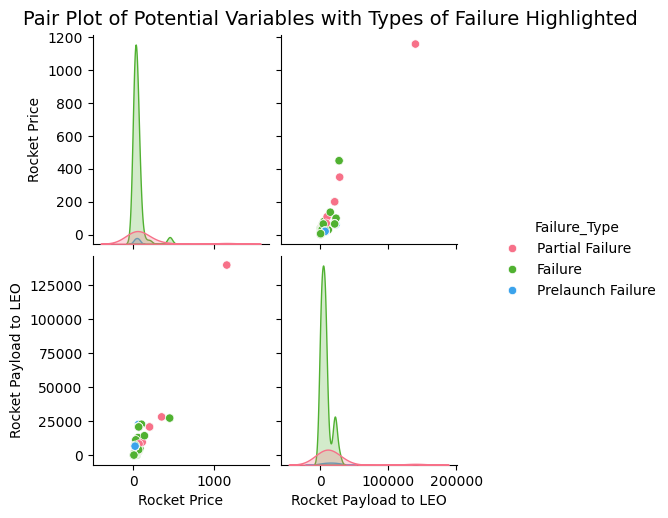

In [20]:
# Create a column for different failure types (ignoring 'Success')
failure_types = ['Partial Failure', 'Failure', 'Prelaunch Failure']
launch_data['Failure_Type'] = launch_data['Launch Status'].apply(
    lambda x: x if x in failure_types else np.nan
)

# Select numerical features for the pair plot, including failure types
selected_features = [
    'Rocket Price',
    'Rocket Payload to LEO',
    'Failure_Type'
]

# Filter only rows with failure types and clean numeric data
failure_data = launch_data[selected_features].dropna(subset=['Failure_Type'])
failure_data = failure_data.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Create a pair plot with different types of failures as hue
sns.pairplot(
    failure_data, 
    hue='Failure_Type', 
    palette='husl', 
    diag_kind='kde'
)
plt.suptitle("Pair Plot of Potential Variables with Types of Failure Highlighted", y=1.02, fontsize=14)
plt.show()